In [387]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_r as sim
from TO_sim.Utility import Create_Folder
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.gen_Distribution import Normal
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
from TO_sim.To_Draw import Draw_theoretical_wData as DD
import parmap
import pandas as pd
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tqdm.notebook import tqdm
from scipy.signal import find_peaks

In [618]:
seed =10
N = 500
theta_random,omega,Kc = Normal(N,0,1,seed=seed)
omega = np.sort(omega)
m = 6
t = np.arange(0,1000,0.1)
K = 3.5
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega)

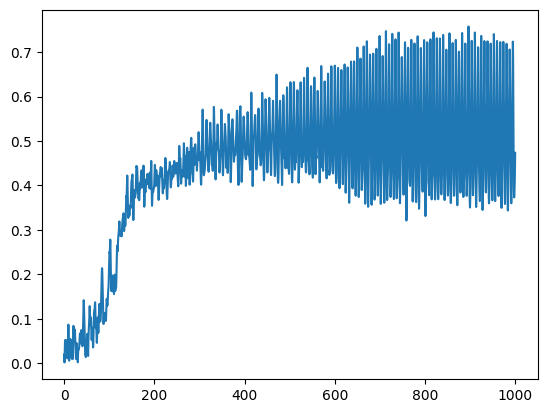

In [619]:
plt.plot(t,rs)

In [620]:
rpsi_s = 1/N*np.sum(np.exp(1j*theta),axis=1)
psi_s = np.angle(rpsi_s)
theta_treat = (theta + np.pi )  % (2*np.pi) - np.pi

In [621]:
sum_time = 500
diff_theta = theta - np.c_[[psi_s for i in range(N) ]].T
diff_theta_treat = (diff_theta+ np.pi )  % (2*np.pi) - np.pi
diff_theta_c = np.cumsum(diff_theta_treat,axis=0)
avg_diff_theta = (diff_theta_c[sum_time:]-diff_theta_c[:-sum_time])/sum_time
dtheta_c = np.cumsum(dtheta,axis=0)
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
sign = np.sign(diff_theta_treat)

Text(0.5, 1.0, "oscillator's sign")

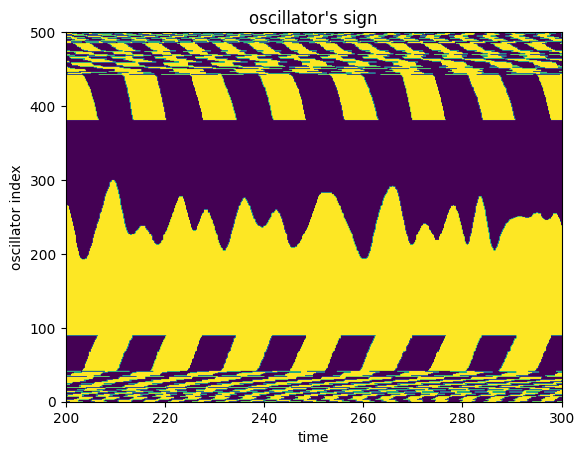

In [622]:
plt.imshow(sign[-500:].T,extent=([t[2000],t[3000],0,500]),aspect='auto')

plt.xlabel('time')
plt.ylabel('oscillator index')
plt.title('oscillator\'s sign')

Text(0.5, 0.95, 'K=3.5, m=6')

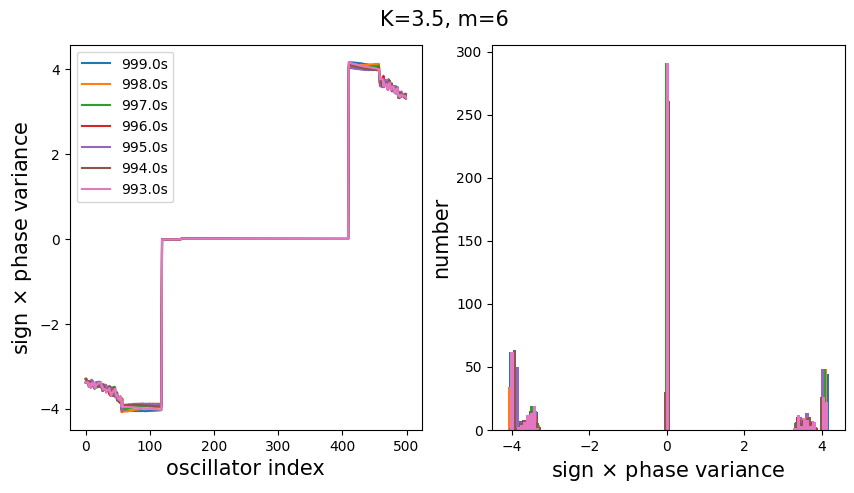

In [623]:
data = []
plt.figure(figsize= (10,5))
plt.subplot(121)

for i in range(10,80,10):
    sign_var = np.sign(diff_theta[-i])*np.var(diff_theta_treat[-(500+i):-(i)],axis=0)
    # sign_var = np.var(sign[-(500+i):-i],axis=0)
    
    # sign_var = np.sign(diff_theta[-i])*np.var(diff_theta_treat[-(500+i):-(i)],axis=0)
    plt.plot(sign_var,label = f'{t[-i]:.01f}s')
    
    # plt.plot(avg_dtheta[-i])
plt.xlabel('oscillator index',fontsize= 15)
plt.ylabel(r'sign $\times$ phase variance',fontsize= 15)
plt.legend()
plt.subplot(122)
for i in range(10,80,10):
    plt.hist(np.sign(diff_theta[-i])*np.var(diff_theta_treat[-(500+i):-(i)],axis=0),bins=100)
    
plt.xlabel(r'sign $\times$ phase variance',fontsize= 15)
plt.ylabel('number',fontsize= 15)
plt.suptitle(f'K={K}, m={m}',y=0.95,fontsize = 15)

(array([ 52.,  10.,   1.,   4.,   8.,   7.,  14.,  11.,  10.,   2.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 291.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   2.,   8.,   7.,   7.,  11.,   5.,   2.,   0.,   0.,  24.,
         24.]),
 array([-4.05237552, -3.97024904, -3.88812256, -3.80599607, -3.72386959,
        -3.6417431 , -3.55961662, -3.47749013, -3.39536365, -3.31323717,
        -3.23111068, -3.1489842 , -3.06685771, -2.98473123, -2.90260474,
        -2.82047826, -2.73835177, -2.65622529, -2.57409881, -2.49197232,
        -2.40984584, -2.32

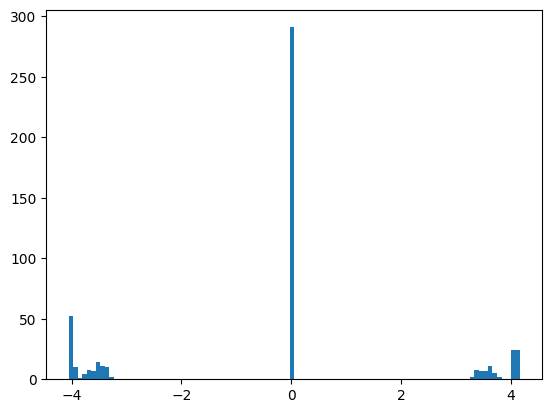

In [636]:
i =1
plt.hist(np.sign(diff_theta[-i])*np.var(diff_theta_treat[-(500+i):-(i)],axis=0),bins=100)

(array([ 84.,  13.,   5.,  15., 127., 184.,   8.,  12.,  11.,  41.]),
 array([-3.12713479e+00, -2.50149896e+00, -1.87586313e+00, -1.25022731e+00,
        -6.24591477e-01,  1.04435137e-03,  6.26680180e-01,  1.25231601e+00,
         1.87795184e+00,  2.50358767e+00,  3.12922349e+00]),
 <BarContainer object of 10 artists>)

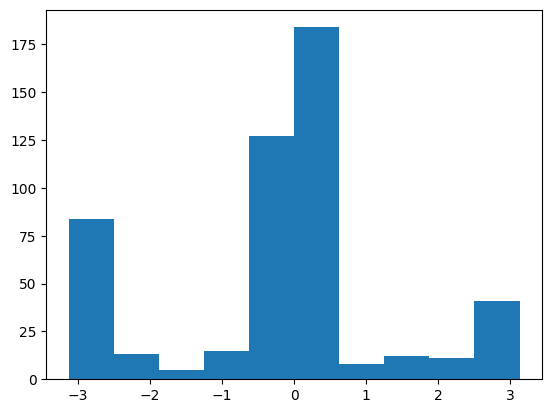

In [413]:
plt.hist(diff_theta_treat[-1])

(array([ 62.,   5.,  15.,  25.,  12.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0., 291.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.,  15.,  18.,   7.,   0.,  48.]),
 array([-4.05237552, -3.88812256, -3.72386959, -3.55961662, -3.39536365,
        -3.23111068, -3.06685771, -2.90260474, -2.73835177, -2.57409881,
        -2.40984584, -2.24559287, -2.0813399 , -1.91708693, -1.75283396,
        -1.58858099, -1.42432803, -1.26007506, -1.09582209, -0.93156912,
        -0.76731615, -0.60306318, -0.43881021, -0.27455724, -0.11030428,
         0.05394869,  0.21820166,  0.38245463,  0.5467076 ,  0.71096057,
         0.87521354,  1.03946651,  1.20371947,  1.36797244,  1.53222541,
         1.69647838,  1.86073135,  2.02498432,  2.18923729,  2.35349026,
         2.51774322,  2.68199619,  2.84624916,  3.01050213,  3.1747551 ,
 

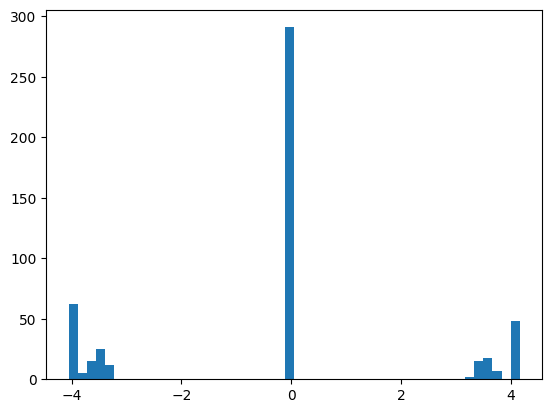

In [638]:
plt.hist(np.sign(diff_theta[-1])*np.var(diff_theta_treat[-(500+i):-(i)],axis=0),bins=50)

# 시간에 따른 그룹의 개수 확인

In [625]:
seed =10
N = 500
theta_random,omega,Kc = Normal(N,0,1,seed=seed)
omega = np.sort(omega)
m = 6
t = np.arange(0,1000,0.1)
K = 3.5
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega)
dtheta_c = np.cumsum(dtheta,axis=0)
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
diff_avg_dtheta = np.diff(avg_dtheta,axis=1)

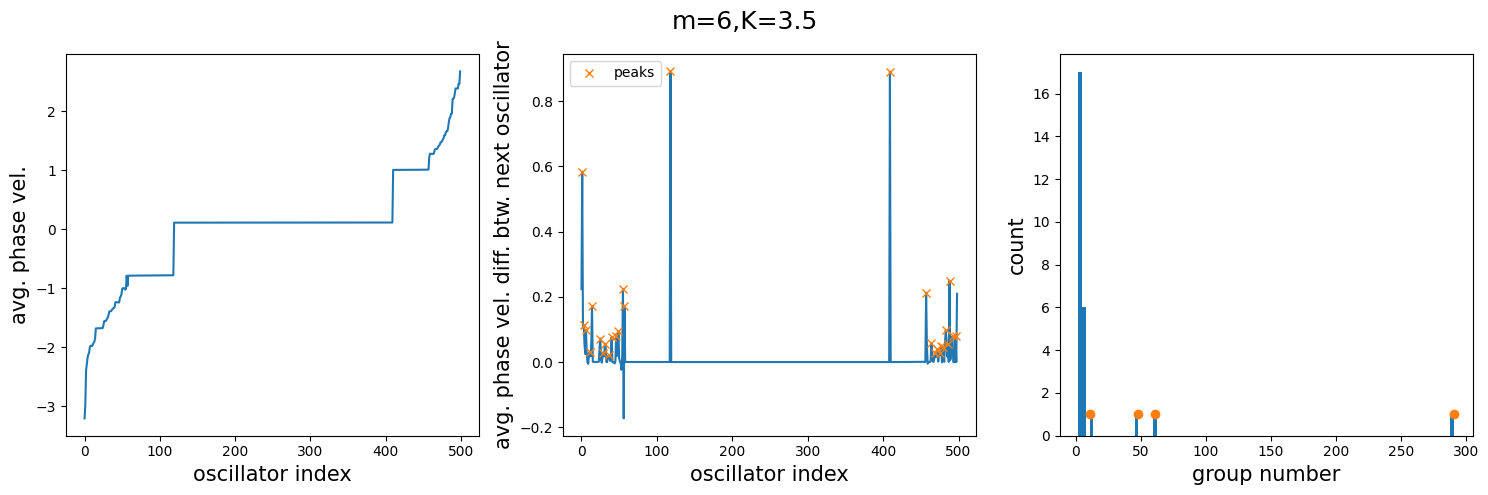

In [626]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(avg_dtheta[-1])
plt.xlabel('oscillator index',fontsize= 15)
plt.ylabel('avg. phase vel.', fontsize= 15)
plt.subplot(132)
diff_dtheta = diff_avg_dtheta[-1]
plt.plot(diff_dtheta)


peaks, _ = find_peaks(diff_dtheta, height=0.01)
plt.plot(peaks, diff_dtheta[peaks], "x",label='peaks')
plt.legend()
plt.xlabel('oscillator index',fontsize= 15)
plt.ylabel('avg. phase vel. diff. btw. next oscillator', fontsize= 15)
# plt.plot(np.zeros_like(diff_dtheta), "--", color="gray")

plt.subplot(133)
diff_peaks = np.sort(np.diff(peaks))[::-1]
plt.hist(diff_peaks,bins=100)

plt.scatter(diff_peaks[:4],[1,1,1,1],color='tab:orange')
plt.xlabel('group number',fontsize= 15)
plt.ylabel('count', fontsize= 15)
plt.suptitle(f'm={m},K={K}',fontsize= 18)
plt.tight_layout()

Text(0, 0.5, 'avg. phase vel.')

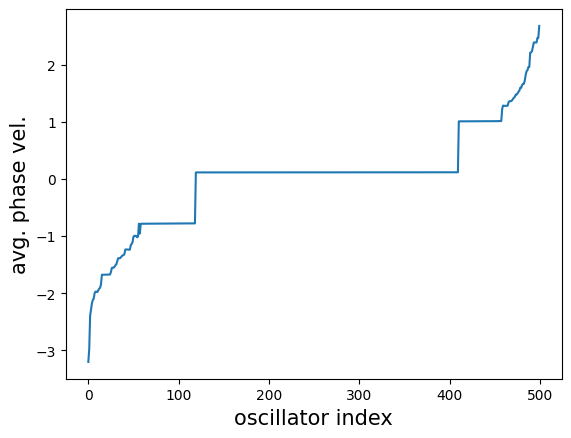

In [627]:
plt.plot(avg_dtheta[-1])
plt.xlabel('oscillator index',fontsize= 15)
plt.ylabel('avg. phase vel.', fontsize= 15)


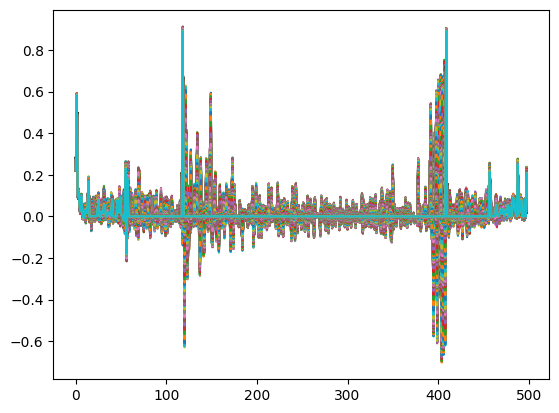

In [628]:
num_data = []
for data in avg_dtheta[::10]:
    diff_dtheta = np.diff(data)
    peaks, _ = find_peaks(diff_dtheta, height=0.01)
    plt.plot(diff_dtheta)
    # plt.plot(peaks, diff_dtheta[peaks], "x")
    # plt.plot(np.zeros_like(diff_dtheta), "--", color="gray")
    num_data.append(np.diff(peaks))

In [629]:
main_ = []

for diff in num_data:
    # plt.hist(diff,bins=20)
    # print(diff[np.where(diff>5)])
    sort_re = np.sort(diff)[::-1]
    # print(sort_re)
    temp = []
    for i in sort_re[:5]:
        temp.append(i)
    for i in range(5- len(sort_re)):
        temp.append(np.NAN)
    main_.append(temp)

Text(0, 0.5, 'order parameter ($r$)')

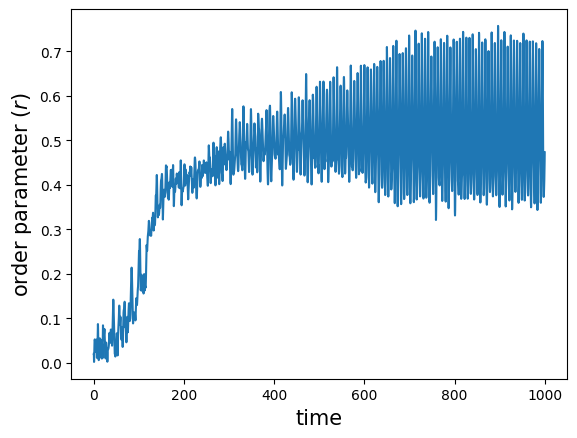

In [630]:
plt.plot(t,rs)
plt.xlabel('time',fontsize=15)
plt.ylabel(r'order parameter ($r$)',fontsize=15)

(0.0, 10.0)

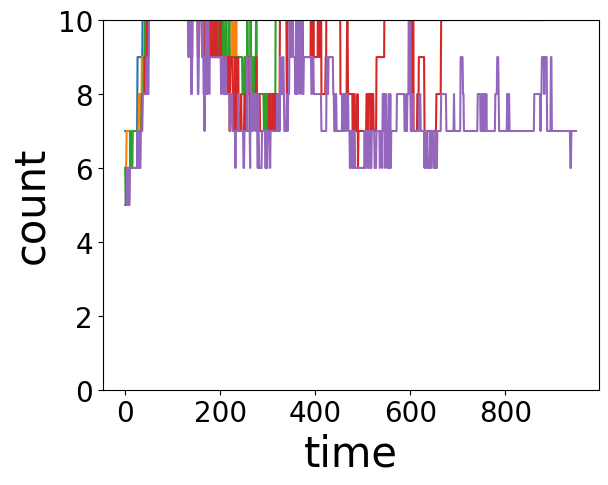

In [631]:
plt.plot(main_,label = ['main group',r'$2^{nd}$ group',r'$3^{rd}$ group',r'$4^{th}$ group',r'$5^{th}$ group'])
plt.xlabel('time',fontsize=30)
plt.ylabel('count',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.title(f'm={m},K={K}',fontsize= 18)
plt.ylim(0,10)
# plt.legend(fontsize=15,c)

In [634]:
main_[-1]

[291, 61, 48, 11, 7]

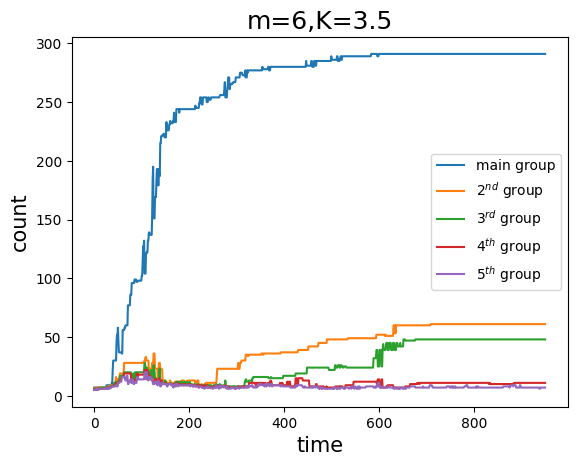

In [632]:
plt.plot(main_,label = ['main group',r'$2^{nd}$ group',r'$3^{rd}$ group',r'$4^{th}$ group',r'$5^{th}$ group'])
plt.xlabel('time',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.title(f'm={m},K={K}',fontsize= 18)

plt.legend()